In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils
%matplotlib inline

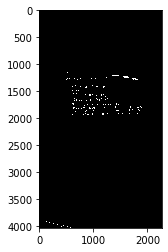

(<matplotlib.image.AxesImage at 0x7fa5f8ebf978>, None)

In [2]:
import numpy as np 
import cv2

img = cv2.imread("sample-b-card.jpg")

#convert image to grayscale
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#blurr image to smooth 
blurr = cv2.GaussianBlur(grey, (5,5),0)

#finding edges 
edge = cv2.Canny(blurr, 75, 200)   

plt.imshow(edge, cmap=plt.cm.gray),plt.show()

In [3]:
cnts = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    print("i am hre")
    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    if len(approx) == 4:
        print("found")
        doc = approx
        break
#cv2.drawContours(img, [doc], -1, (0, 255, 0), 2)
#plt.imshow(img),plt.show()

i am hre
i am hre
i am hre
i am hre
i am hre


In [4]:
doc=doc.reshape((4,2))

#create a new array and initialize 
new_doc = np.zeros((4,2), dtype="float32")

Sum = doc.sum(axis = 1)
new_doc[0] = doc[np.argmin(Sum)]
new_doc[2] = doc[np.argmax(Sum)]

Diff = np.diff(doc, axis=1)
new_doc[1] = doc[np.argmin(Diff)]
new_doc[3] = doc[np.argmax(Diff)]

(tl,tr,br,bl) = new_doc

#find distance between points and get max 
dist1 = np.linalg.norm(br-bl)
dist2 = np.linalg.norm(tr-tl)

maxLen = max(int(dist1),int(dist2))

dist3 = np.linalg.norm(tr-br)
dist4 = np.linalg.norm(tl-bl)

maxHeight = max(int(dist3), int(dist4))

dst = np.array([[0,0],[maxLen-1, 0],[maxLen-1, maxHeight-1], [0, maxHeight-1]], dtype="float32")

N = cv2.getPerspectiveTransform(new_doc, dst)
warp = cv2.warpPerspective(img, N, (maxLen, maxHeight))
img2 = cv2.cvtColor(warp, cv2.COLOR_BGR2GRAY)

NameError: name 'doc' is not defined

In [ ]:
plt.imshow(img2),plt.show()

In [ ]:
import cv2
import numpy as np
import rect
from matplotlib import pyplot as plt
import imutils
%matplotlib inline
# add image here.
# We can also use laptop's webcam if the resolution is good enough to capture
# readable document content
image = cv2.imread("sample-dl-2.jpg")

# resize image so it can be processed
# choose optimal dimensions such that important content is not lost
image = cv2.resize(image, (1500, 880))

# creating copy of original image
orig = image.copy()

# convert to grayscale and blur to smooth
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (1, 1), 1)
    
thresh1 = cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(blurred, cmap=plt.cm.gray),plt.show()


In [ ]:
plt.imshow(gray, cmap=plt.cm.gray),plt.show()

In [ ]:
import pytesseract
config = ('-l eng --oem 1 --psm 3')
text = pytesseract.image_to_string(blurred, config=config)
print(text)